In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inflation-interest-and-unemployment-rate/inflation interest unemployment.csv


# Inspiration

#### As a student who is studying business now and previously studied economics, I have always wondered to myself whether the materials taught to us in economics textbook hold true in the real world. 
#### I am naturally a skeptic so I would bet it ain't true. 
#### If everything happened as written in the textbook, the world would be an easier place to manage. 
#### I set out today to put my doubtfulness to the test and observe what the data has to say. 
#### I want to see whether conventional beliefs holds true, in the face of real world data.

<div style="width:100%;text-align: center;"> <img align=middle src="https://images.unsplash.com/photo-1620424393934-04e772be09f4?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MTB8fGN1cmlvdXN8ZW58MHx8MHx8&auto=format&fit=crop&w=500&q=60" style="width:30%;height:30%;margin:auto;"> </div>

# Brief look at the Dataset

In [2]:
df = pd.read_csv('../input/inflation-interest-and-unemployment-rate/inflation interest unemployment.csv')
df

,country,year,"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)",Real interest rate (%),Deposit interest rate (%),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",iso3c,iso2c,adminregion,incomeLevel
0,Afghanistan,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,AF,South Asia,Low income
1,Afghanistan,1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,AF,South Asia,Low income
2,Afghanistan,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,AF,South Asia,Low income
3,Afghanistan,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,AF,South Asia,Low income
4,Afghanistan,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,AF,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13827,Zimbabwe,2017,0.893962,2.437608,4.370035,3.274167,6.914167,NaN,4.785,ZWE,ZW,Sub-Saharan Africa (excluding high income),Lower middle income
13828,Zimbabwe,2018,10.618866,59.803356,-32.960315,2.532500,7.131667,NaN,4.796,ZWE,ZW,Sub-Saharan Africa (excluding high income),Lower middle income
13829,Zimbabwe,2019,255.304991,440.829791,-78.517887,2.975000,16.181667,16.860001,4.833,ZWE,ZW,Sub-Saharan Africa (excluding high income),Lower middle income
13830,Zimbabwe,2020,557.201817,558.560024,-79.803157,4.518333,33.008333,NaN,5.351,ZWE,ZW,Sub-Saharan Africa (excluding high income),Lower middle income


## Look at the United States

In [3]:
df.loc[df['country'] == 'United States'].head()

,country,year,"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)",Real interest rate (%),Deposit interest rate (%),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",iso3c,iso2c,adminregion,incomeLevel
13156,United States,1970,5.838255,5.602170,2.185400,NaN,7.910000,4.9,NaN,USA,US,NaN,High income
13157,United States,1971,4.292767,5.069167,0.622605,NaN,5.723333,5.9,NaN,USA,US,NaN,High income
13158,United States,1972,3.272278,4.322751,0.887229,NaN,5.248333,5.6,NaN,USA,US,NaN,High income
13159,United States,1973,6.177760,5.479881,2.409735,NaN,8.021667,4.9,NaN,USA,US,NaN,High income
13160,United States,1974,11.054805,8.998695,1.651064,NaN,10.798333,5.6,NaN,USA,US,NaN,High income


# Comparison of Inflation with Unemployment

## Analysis of United States

#### Let us look at what the data looks for in the United States.

In [4]:
us_inflation = df.loc[df['country'] == 'United States'][['year','Inflation, consumer prices (annual %)']]
us_inflation.rename(columns = {'Inflation, consumer prices (annual %)':'Inflation', 'year':'Year'},inplace=True)
us_inflation.set_index('Year',inplace=True)
us_inflation.head()

,Inflation
Year,
1970,5.838255
1971,4.292767
1972,3.272278
1973,6.177760
1974,11.054805


Text(0, 0.5, 'Inflation')

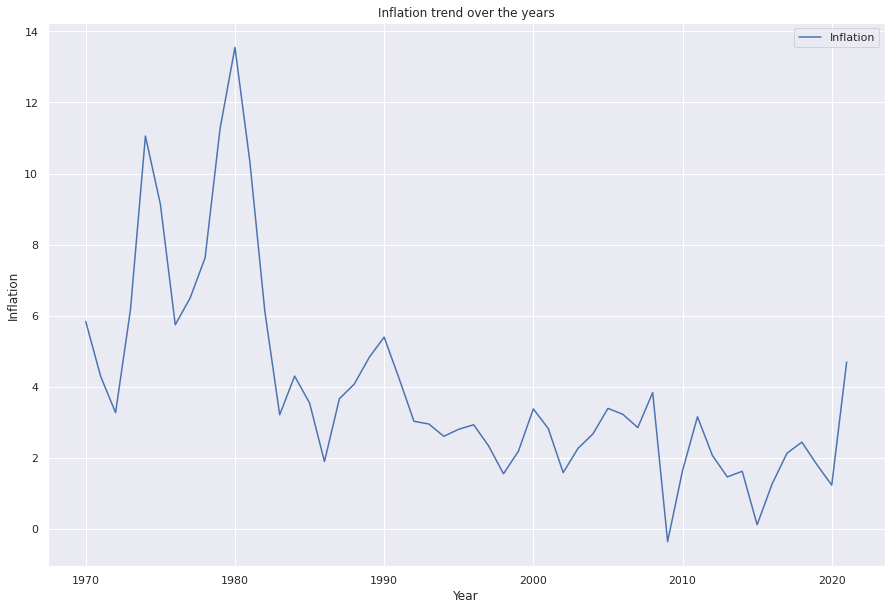

In [5]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.lineplot(data = us_inflation)
ax.set_title('Inflation trend over the years')
ax.set_xlabel('Year')
ax.set_ylabel('Inflation')

In [6]:
us_unemployment = df.loc[df['country'] == 'United States'][['year','Unemployment, total (% of total labor force) (national estimate)']]
us_unemployment.rename(columns = {'Unemployment, total (% of total labor force) (national estimate)':'Unemployment', 'year':'Year'},inplace=True)
us_unemployment.set_index('Year',inplace=True)
us_unemployment.head()

,Unemployment
Year,
1970,4.9
1971,5.9
1972,5.6
1973,4.9
1974,5.6


Text(0, 0.5, 'Unemployment')

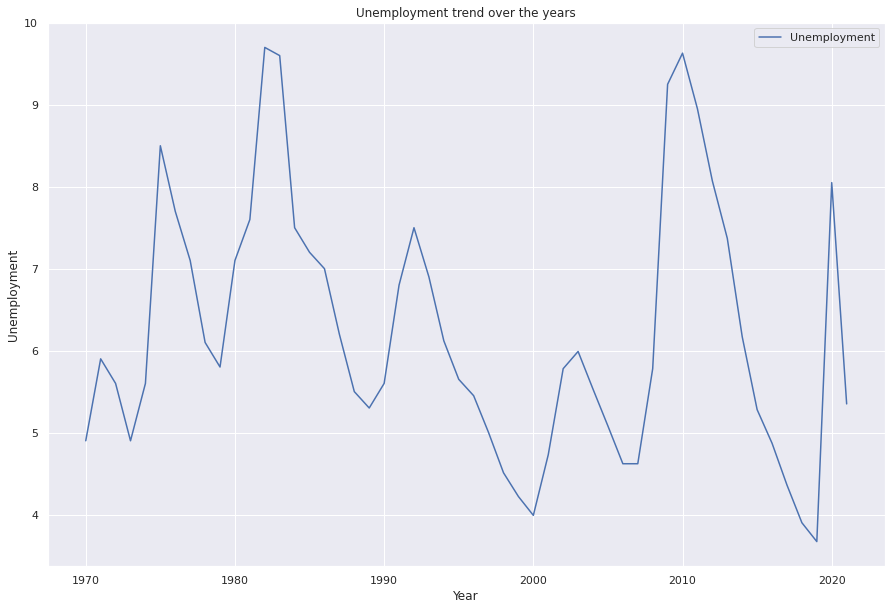

In [7]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.lineplot(data = us_unemployment)
ax.set_title('Unemployment trend over the years')
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment')

In [8]:
us_unemployment_inflation = df.loc[df['country'] == 'United States'][['year','Inflation, consumer prices (annual %)','Unemployment, total (% of total labor force) (national estimate)']]
us_unemployment_inflation.rename(columns = {'Inflation, consumer prices (annual %)':'Inflation','Unemployment, total (% of total labor force) (national estimate)':'Unemployment', 'year':'Year'},inplace=True)
us_unemployment_inflation.set_index('Year',inplace=True)
us_unemployment_inflation.head()

,Inflation,Unemployment
Year,,
1970,5.838255,4.9
1971,4.292767,5.9
1972,3.272278,5.6
1973,6.177760,4.9
1974,11.054805,5.6


Text(0.5, 0, 'Year')

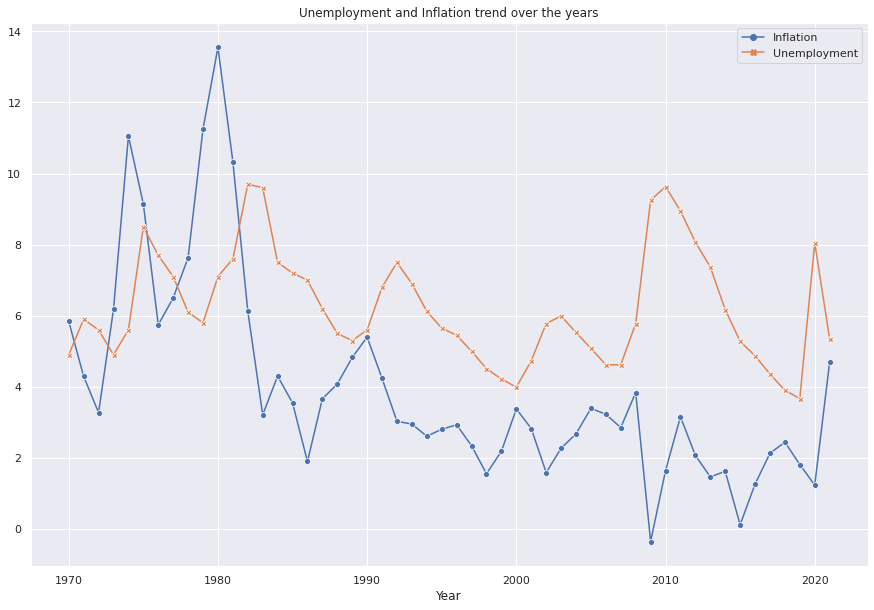

In [9]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.lineplot(data = us_unemployment_inflation,markers=True,dashes=False)
ax.set_title('Unemployment and Inflation trend over the years')
ax.set_xlabel('Year')

### At a glance, these two phenomena do appear be related... somewhat...
### Let us obtain a numerical figure such as the Pearson’s Correlation for these two datapoints.

In [10]:
from scipy.stats import pearsonr
corr, _ = pearsonr(us_unemployment_inflation['Inflation'], us_unemployment_inflation['Unemployment'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.112


### Now the Pearson's Correlation is not meaningful to us. It has a value near 0 which means there is no significant relation.
### Economically speaking, [Inflation and Unemployment are inversely related](https://www.investopedia.com/ask/answers/040715/what-happens-when-inflation-and-unemployment-are-positively-correlated.asp).
### The brief idea is that with high growth and a boom in economy, inflation is ushered in. With this growth in economy, unemployment decreases with a higher demand for jobs from businesses. 
### Now of course, this is just the theory and there can obviously be exceptions, stagflation being the most obvious.

## Dynamic Time Warping

### This makes me think maybe there might be a slight delay between these two variables. 
### From the explanation above, it sounds like inflation rises first and then unemployment falls. 
### This brought me to utilize [Dynamic Time Warping for time series analysis](https://medium.com/walmartglobaltech/time-series-similarity-using-dynamic-time-warping-explained-9d09119e48ec). 
### I do wish we had a more datapoints over a longer time period but let's see how this goes.
### I have performed this operation using two different packages.

In [11]:
pip install dtw-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 634.8/634.8 kB 839.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



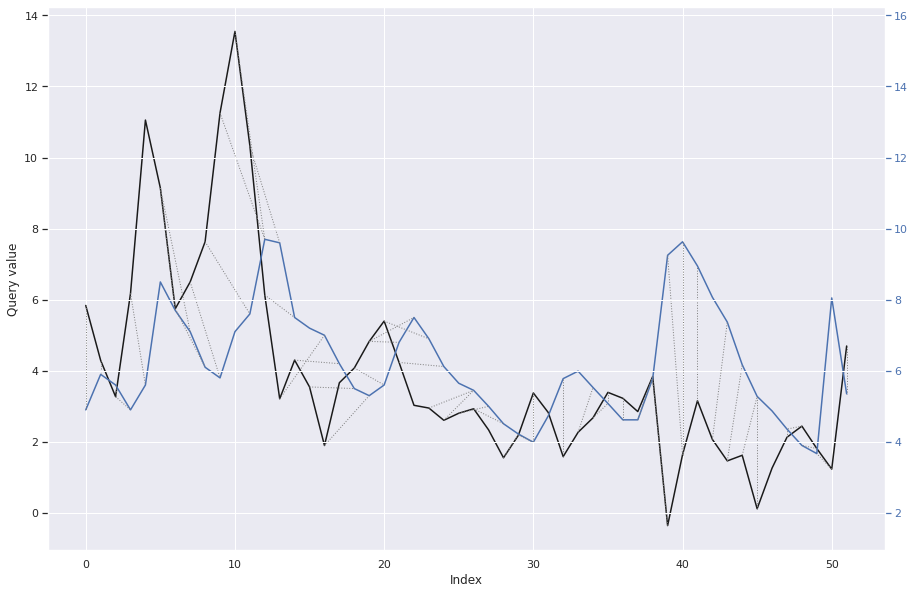

<AxesSubplot:xlabel='Index', ylabel='Query value'>

In [12]:
from dtw import *

dtw(us_unemployment_inflation['Inflation'], us_unemployment_inflation['Unemployment'], keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

In [13]:
pip install dtaidistance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.0/539.0 kB 819.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


The DTW distance is: 13.335347614961709


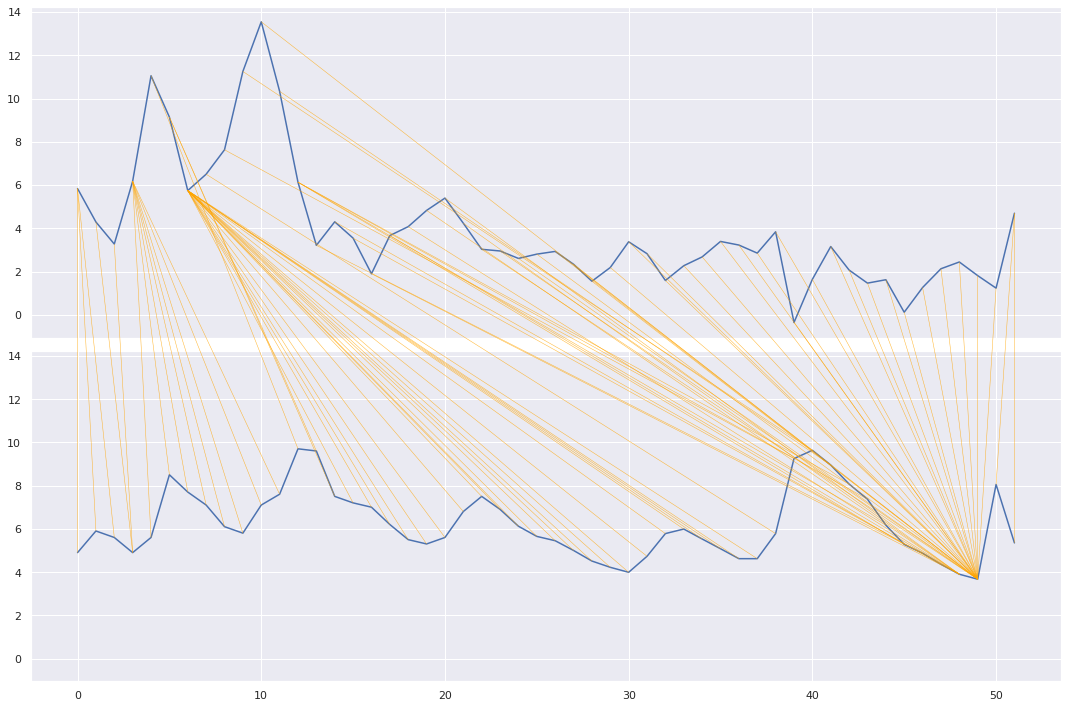

In [14]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
path = dtw.warping_path(np.array(us_unemployment_inflation['Inflation']), np.array(us_unemployment_inflation['Unemployment']))
dtwvis.plot_warping(np.array(us_unemployment_inflation['Inflation']), np.array(us_unemployment_inflation['Unemployment']), path)
distance = dtw.distance(np.array(us_unemployment_inflation['Inflation']), np.array(us_unemployment_inflation['Unemployment']))
print("The DTW distance is: {}".format(distance))

### Now we know that although in theory they might have a slight delay close to a perfect relationship, it turns out the math doesn't support it, and I believe it.
### Economics Theory works like magic, only on paper. Throughout history, there have been wars, recessions, crisis that humanity had to go through and theory is definitely not perfect during those time periods.
### Or maybe this is just a United States problem. How about the other countries available in this dataset? 

## Analysis of other countries

In [15]:
valid_countries = []
for country in list(df.country.unique()):
    null_sum = df[df.country == country][['Inflation, consumer prices (annual %)', 'Unemployment, total (% of total labor force) (national estimate)']].isna().sum().sum()
    if null_sum == 0:
        valid_countries.append(country)
        
display(valid_countries)

['Japan', 'United States']

#### Sadly we only have one other country where the complete data for inflation and unemployment is available. 
#### Let us take a look at the DTW distance for Japan.

The DTW distance is: 29.00856415909134


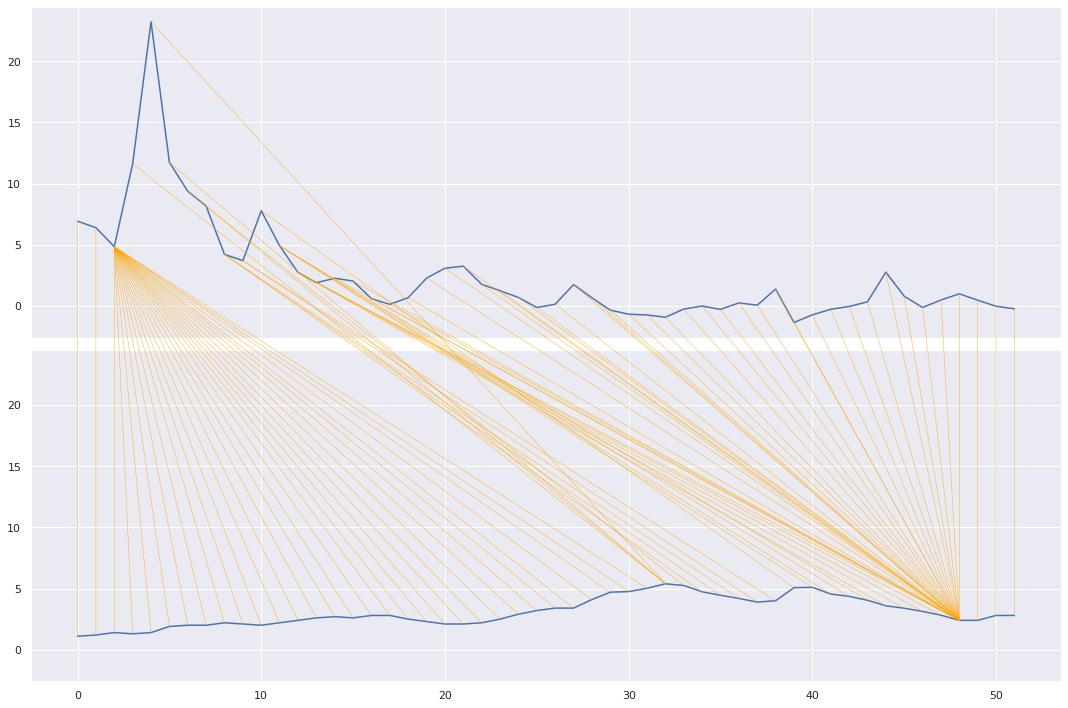

In [16]:
path = dtw.warping_path(np.array(df[df.country=='Japan']['Inflation, consumer prices (annual %)']), np.array(df[df.country=='Japan']['Unemployment, total (% of total labor force) (national estimate)']))
dtwvis.plot_warping(np.array(df[df.country=='Japan']['Inflation, consumer prices (annual %)']), np.array(df[df.country=='Japan']['Unemployment, total (% of total labor force) (national estimate)']), path)
distance = dtw.distance(np.array(df[df.country=='Japan']['Inflation, consumer prices (annual %)']), np.array(df[df.country=='Japan']['Unemployment, total (% of total labor force) (national estimate)']))
print("The DTW distance is: {}".format(distance))

#### Whao! The DTW distance is much larger compared to the United States.
#### Visually, it is also hard to say that there is much connectino between these two graphs above. 
#### We can take a look at the individual graphs in detail below.

Text(0.5, 0, 'Year')

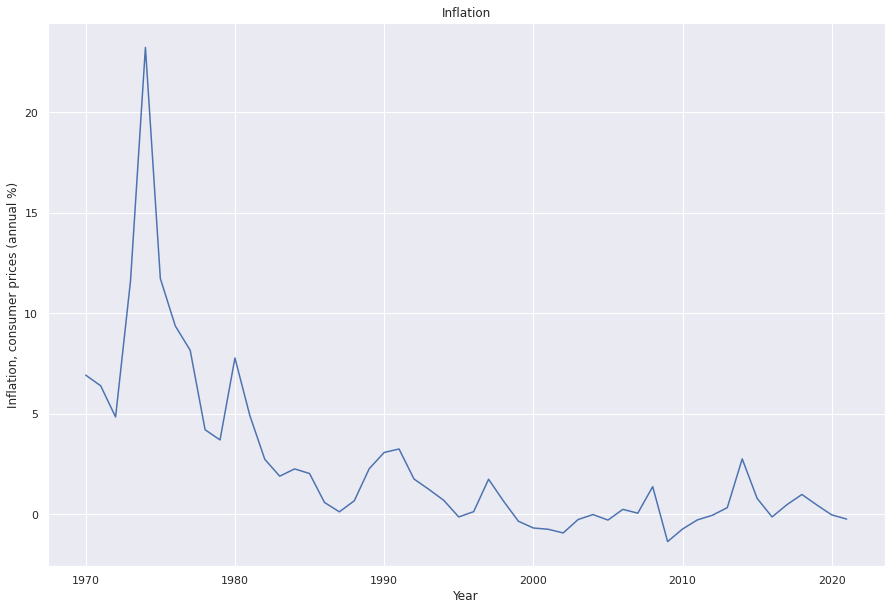

In [17]:
ax = sns.lineplot(y = df[df.country=='Japan']['Inflation, consumer prices (annual %)'], x= df[df.country=='Japan']['year'], markers=True,dashes=False)
ax.set_title('Inflation')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

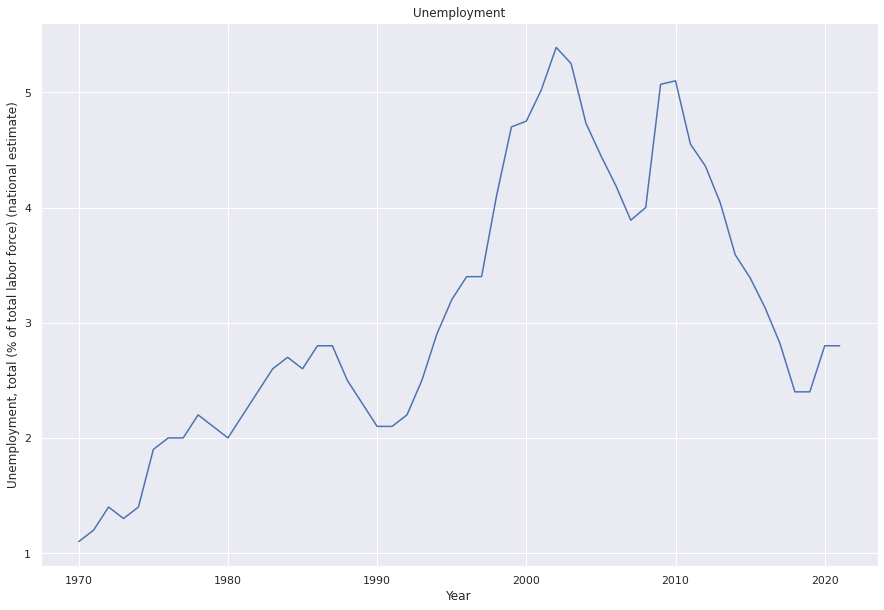

In [18]:
ax = sns.lineplot(y = df[df.country=='Japan']['Unemployment, total (% of total labor force) (national estimate)'], x= df[df.country=='Japan']['year'], markers=True,dashes=False)
ax.set_title('Unemployment')
ax.set_xlabel('Year')

#### Now we can see that roughly as inflation falls, unemployment slowly creeps up.
#### However, there isn't a very regular time series pattern that our DTW approach would catch.
#### At this point, it is probably important that you understand what happened with Japan from 1970, as shown in the data. 
#### Japan has been experiencing very [low inflation](https://www.moneycontrol.com/news/business/explained-why-japans-inflation-problems-are-of-a-different-kind-8711491.html), **consistently**, with little regard for what kind of economic situation it is in. 
#### Please feel free to read more about Japan's economics situation and approach from the link above. 
#### Therefore I would say Japan isn't the best alternative country we could be looking at.


#### However, the DTW approach still goes to show that strictly mathematically, it is hard to conclude that there is a straightforward relationship between inflation and unemployment, unlike what many economic textbooks tend to say. 
#### Obviously textbooks are just the start and one should always look at the real world to see what reality actually is, **especially for economics**.

# Comparison of Interest Rate with Inflation

#### Now just ending it off like this would leave readers with more questions than answers. 
#### You may be wondering, "So is there anything true about what the economics textbook says?" 
#### That is why I wish to venture into the territory of Interest Rate and Inflation. 

#### Theory wise, these two are [very related](https://www.investopedia.com/ask/answers/12/inflation-interest-rate-relationship.asp). 
#### The basic idea is that the two variables generally move in the same direction.
#### Generally, higher inflation calls for higher interest rate, making interest rate one of the strongest weapon to combat inflation for many countries, including the United States. 

## Analysis of United States

#### Let us take a look at the data for United States again.
#### For those of you who are aware of what happened to the economy of United States, you might already know how the graphs would look like and whether they are related even in the slightest bit.

Text(0.5, 0, 'Year')

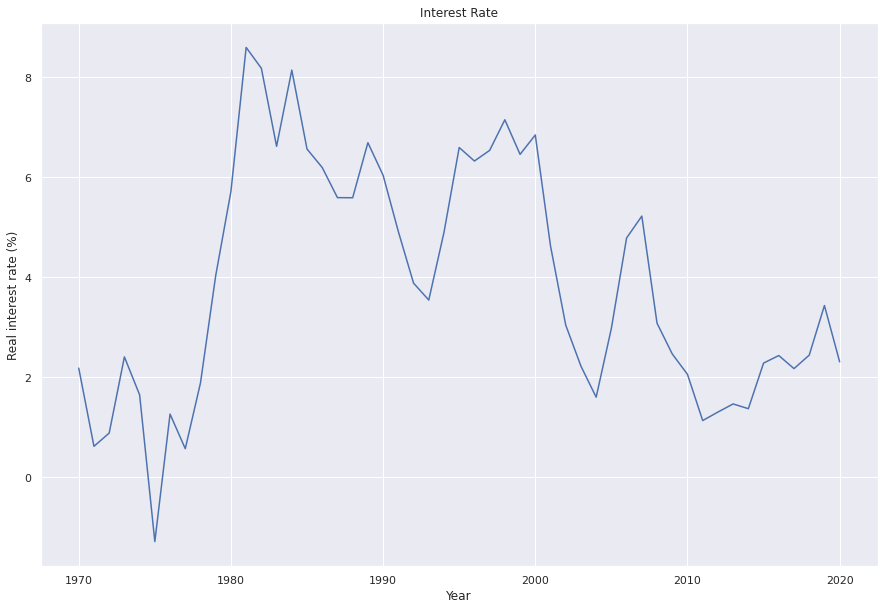

In [19]:
ax = sns.lineplot(y = df[df.country=='United States']['Real interest rate (%)'], x= df[df.country=='United States']['year'], markers=True,dashes=False)
ax.set_title('Interest Rate')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

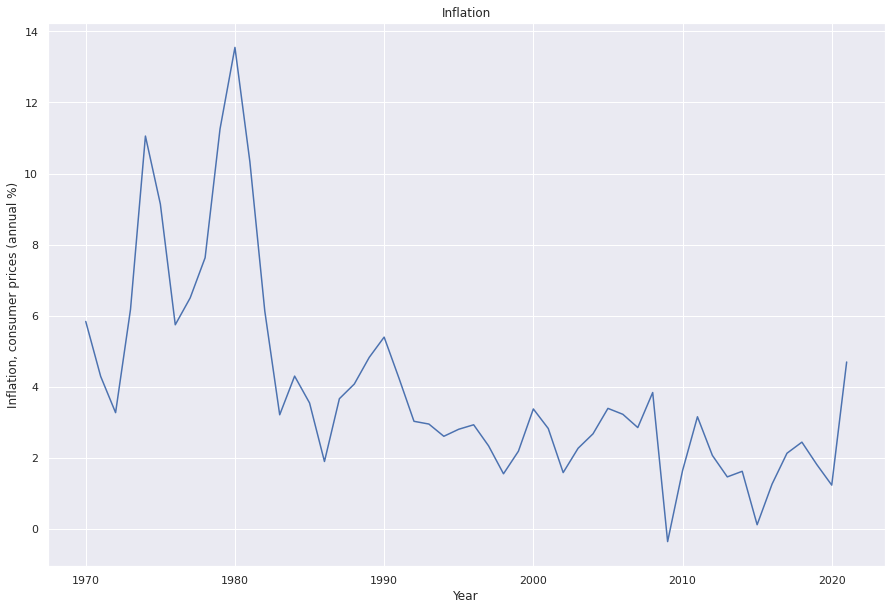

In [20]:
ax = sns.lineplot(y = df[df.country=='United States']['Inflation, consumer prices (annual %)'], x= df[df.country=='United States']['year'], markers=True,dashes=False)
ax.set_title('Inflation')
ax.set_xlabel('Year')

#### The most noticeable is the spike around 1970 to 1980 and our theory seems to stand strong during that period. 
#### With a rise in inflation, there was an increase in interest rate too. 
#### This was the well-known move by Paul Volcker, the Fed chairman back then. 
#### He proceeded to [pump up interest rates](https://www.npr.org/2022/02/13/1080464204/this-is-what-was-happening-40-years-ago-the-last-time-inflation-was-this-high) in order to ensure inflation is brought back down, no matter the cost. 

#### Now that is what was happening back then. 
#### Let us see whether our theory stands when faced with mathematical rigour.

The DTW distance is: 12.49923962298604


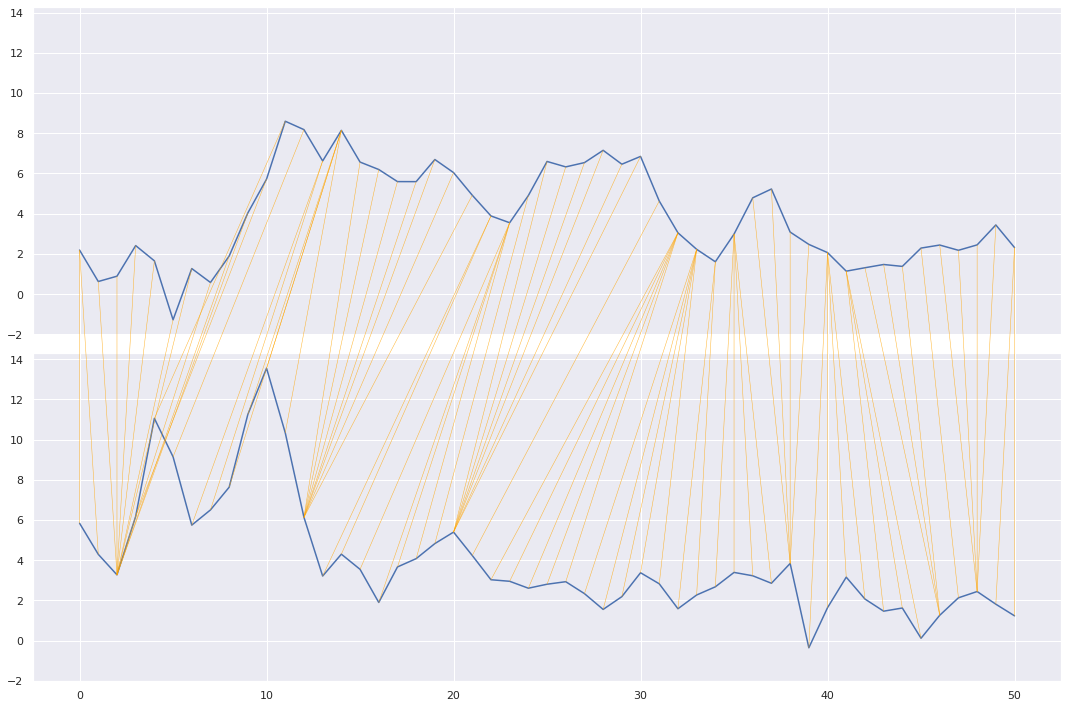

In [21]:
path = dtw.warping_path(np.array(df[df.country=='United States']['Real interest rate (%)'])[:-1], np.array(df[df.country=='United States']['Inflation, consumer prices (annual %)'])[:-1])
dtwvis.plot_warping(np.array(df[df.country=='United States']['Real interest rate (%)'])[:-1], np.array(df[df.country=='United States']['Inflation, consumer prices (annual %)'])[:-1], path)
distance = dtw.distance(np.array(df[df.country=='United States']['Real interest rate (%)'][:-1]), np.array(df[df.country=='United States']['Inflation, consumer prices (annual %)'])[:-1])
print("The DTW distance is: {}".format(distance))

#### It is not much different from our comparison of inflation and unemployment. 
#### The only similar time series trend that we can observe is before the 2000s and after the 2000s, there was the dot-com bubble burst and the Great Financial Crisis and the recoveries from the crisis. 
#### These phenomena is the explanation behind the complex relationships between economics variables. 

# Conclusion

#### I hope after reading this notebook, one thing you might take away is that the knowledge and theories taught by the textbook is only the tip of the iceberg. 
#### Make sure to read up on news, understand past events and know the 'why' for changes in economic conditions to ensure you don't end up like the Titanic, crashing into the iceberg when you thought you can dodge it.

#### I am no expert in economics or business but ever since keeping up with the news actively 5 years ago, one thing I tell myself is that there is no hard and fast rules in the world of economics. 
#### Just because something happened in the past doesn't mean the same thing would happen in the future. 
#### Just because some expert comes along and says so, doesn't mean it would turn out that way. 
#### Even with the most elaborate theory, in my opinion, experience and true understanding of economic fundemantals is the most important portion.

#### If you enjoyed this notebook, do please upvote it!
#### If you would like to look at some of my other works, including machine learning algorithm explanations, do feel free to check out my account!

# Credits

* https://medium.com/walmartglobaltech/time-series-similarity-using-dynamic-time-warping-explained-9d09119e48ec
* https://www.moneycontrol.com/news/business/explained-why-japans-inflation-problems-are-of-a-different-kind-8711491.html